Average Test Score: 70.0
Minimum Test Score: 40.0
Maximum Test Score: 99.0
Standard Deviation of Study Hours: 2.566008573641172
Students who achieved the highest test scores:
Student ID: 82, Test Score: 99.0
Student ID: 109, Test Score: 99.0
Student ID: 128, Test Score: 99.0
Student ID: 168, Test Score: 99.0
the age and test score of the youngest student  
     Age  TestScore
3     18         51
26    18         92
40    18         74
43    18         82
44    18         50
45    18         57
48    18         48
51    18         83
56    18         52
59    18         48
66    18         76
68    18         58
70    18         87
78    18         84
80    18         75
81    18         45
83    18         70
90    18         65
91    18         58
104   18         40
114   18         77
115   18         92
133   18         59
134   18         96
137   18         80
140   18         54
141   18         70
151   18         51
154   18         55
156   18         77
163   18         67
1

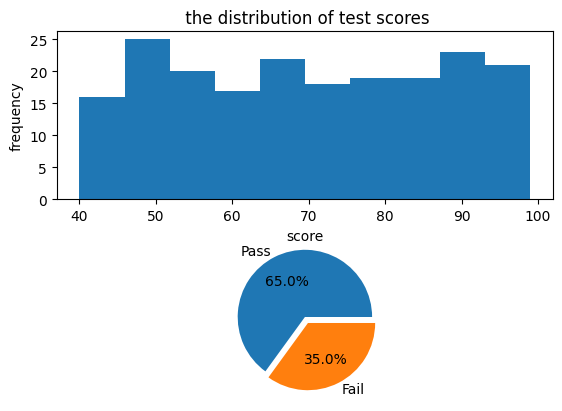

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
x = np.genfromtxt('D:\\projects\security\student_data.csv', delimiter=',', dtype=[('StudentID', 'i'), ('Gender', 'U20'), ('Age', 'i'),("StudyHours","i"),("TestScore","i"),("Grade","U20")])

# drop the the head of data 
data=pd.DataFrame(x).drop(0)

# Calculate average test score
avg_test_score = np.mean(data['TestScore'])
print(f'Average Test Score: {avg_test_score:.1f}')

# Calculate minimum test score
min_test_score = np.min(data['TestScore'])
print(f'Minimum Test Score: {min_test_score:.1f}')

# Calculate maximum test score
max_test_score = np.max(data['TestScore'])
print(f'Maximum Test Score: {max_test_score:.1f}')

# Calculate standard deviation of study hours
std_study_hours = np.std(data['StudyHours'])
print(f'Standard Deviation of Study Hours: {std_study_hours:.15f}')


# Find students with the highest test scores
highest_test_scores = data[data['TestScore'] == max_test_score]
print('Students who achieved the highest test scores:')
for index, row in highest_test_scores.iterrows():
    print(f'Student ID: {row["StudentID"]:.0f}, Test Score: {row["TestScore"]:.1f}')

# Find the youngest student and their test score
youngest=data[["Age","TestScore"]][data["Age"]==np.min(data["Age"])]
print(f"the age and test score of the youngest student  \n{youngest}")

#filter the data only femal 

female_students=data[data["Gender"]=="Female"]
# save it as a new file named  "female_students.csv". 
female_students.to_csv("female_students.csv",index=False)

#the average study hours for male

avarege_of_male=sum(data[data["Gender"]=="Male"]["StudyHours"])/len(data[data["Gender"]=="Male"])
print(f"the average study hours for male = {avarege_of_male}  Hours")

# Calculate the percentage of students who passed the test (grade >= 60).
pass_student=data[["Grade"]][data["TestScore"]>=60].count()
percentage=pass_student/len(data["Grade"])*100
print(f"the percentage of students who passed the test {percentage}%")
# to count  the pass and fail to draw pie chart 
count_pass=len(data[data["Grade"]=="Pass"])
count_Fail=len(data[data["Grade"]=="Fail"])
#for segmentation the figure
plt.subplot(211)
#draw the histogram
plt.hist(data["TestScore"])
plt.title(" the distribution of test scores")
plt.xlabel("score")
plt.ylabel("frequency")
plt.subplot(212)
# to draw pie chart
plt.pie([count_pass,count_Fail],labels=["Pass","Fail"],explode=[0,0.1],autopct="%0.1f%%")
# to show the figure
plt.show()